In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Implementing basic model

In [3]:
## Get A function

def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    num_of_agents = len(opinions)

    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

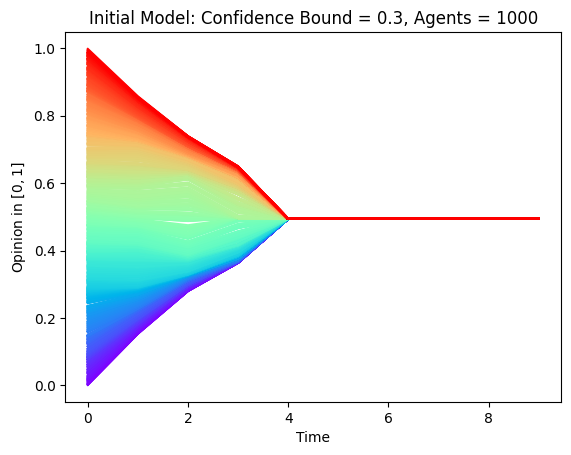

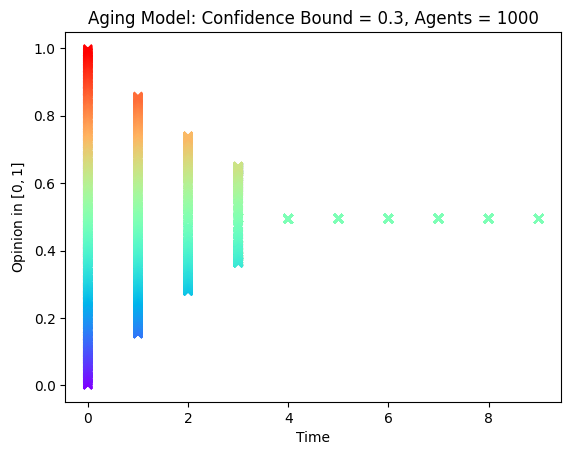

array([[9.34976387e-04, 1.60236128e-03, 1.63231444e-03, ...,
        9.94269421e-01, 9.95900843e-01, 9.98502308e-01],
       [1.53070821e-01, 1.53070821e-01, 1.53070821e-01, ...,
        8.54944669e-01, 8.56021261e-01, 8.57648160e-01],
       [2.79955652e-01, 2.79955652e-01, 2.79955652e-01, ...,
        7.38956318e-01, 7.38956318e-01, 7.39391842e-01],
       ...,
       [4.94214008e-01, 4.94214008e-01, 4.94214008e-01, ...,
        4.94214008e-01, 4.94214008e-01, 4.94214008e-01],
       [4.94214008e-01, 4.94214008e-01, 4.94214008e-01, ...,
        4.94214008e-01, 4.94214008e-01, 4.94214008e-01],
       [4.94214008e-01, 4.94214008e-01, 4.94214008e-01, ...,
        4.94214008e-01, 4.94214008e-01, 4.94214008e-01]], shape=(10, 1000))

In [4]:
# Initialise parameters:
num_of_agents = 1000 # number of agents
Timesteps = 10 # timesteps
R = 0.3 # confidence bound

opinions = np.random.rand(num_of_agents) # init all agents to [0,1]




# Running model

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions

## Iterate model over time
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)



# Plotting results
colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i],color=colours[i])
plt.title(f'Initial Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()


colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))
plt.scatter(np.array([range(Timesteps)]*num_of_agents).T, opinions_over_time, c=opinions_over_time, cmap='rainbow', marker='x')
plt.title(f'Aging Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()

opinions_over_time

## Experiment: how does R value affect number of clusters?

[[20. 18. 18. ... 16. 17. 14.]
 [18. 18. 16. ... 15. 18. 15.]
 [11. 15. 10. ... 12. 14. 15.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
[16.68 15.11 13.03 11.88 10.71  9.44  8.89  7.72  7.11  6.52  5.82  5.54
  5.    4.7   4.32  4.1   4.    3.73  3.48  3.43  3.37  3.15  3.03  2.85
  2.75  2.59  2.53  2.39  2.44  2.24  2.23  2.22  2.12  2.04  1.92  1.84
  1.94  1.74  1.84  1.75  1.71  1.6   1.55  1.53  1.61  1.43  1.5   1.32
  1.3   1.28  1.26  1.28  1.22  1.14  1.2   1.14  1.08  1.12  1.07  1.12
  1.09  1.06  1.03  1.01  1.    1.02  1.01  1.    1.    1.    1.    1.
  1.    1.01  1.01  1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.  ]


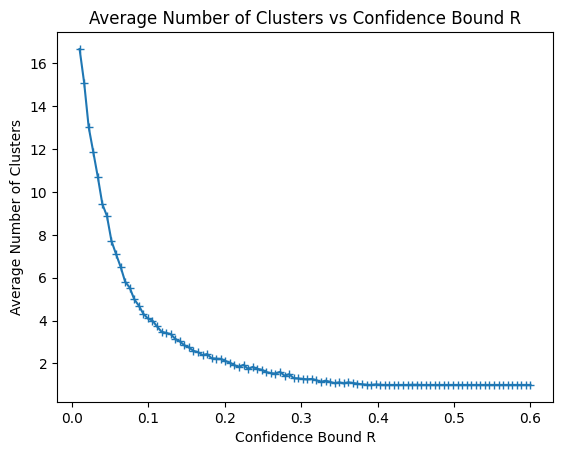

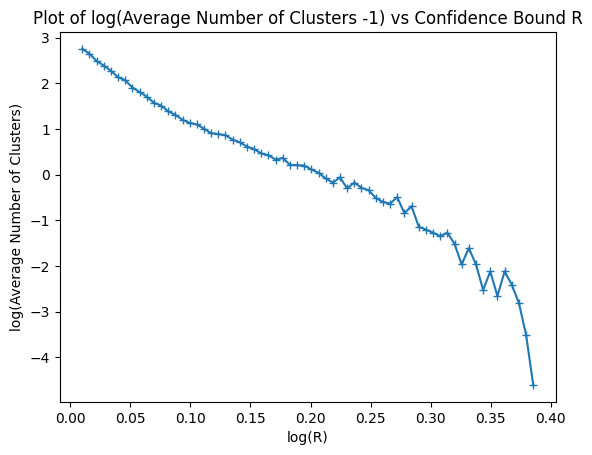

For R > 0.3914141414141414, consensus is always reached.
For R > 0.27818181818181814, consensus is achieved the majority of the time.


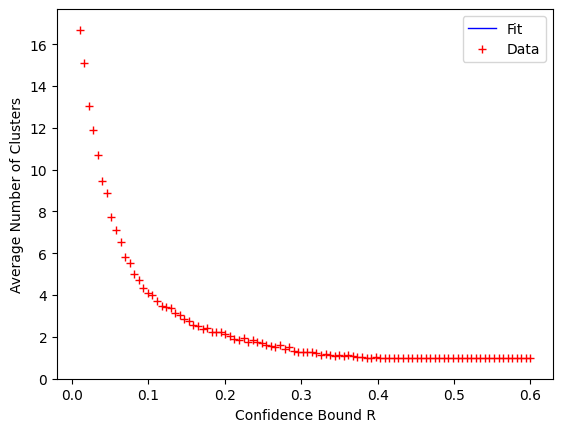

In [ ]:
## Paramters
num_agents = 10
Timesteps = 10

## List of R values to test
R_list = np.linspace(0.01,0.6,100)#[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

## Number of repeats per R value
num_repeats = 100

## Initialise cluster count storage arrays
cluster_counts = np.zeros((len(R_list), num_repeats))


## Run experiment
for i, R in enumerate(R_list):
    for repeat in range(num_repeats):

        ## Setting up initial opinions
        opinions = np.random.rand(num_agents)
        opinions_over_time = np.zeros((Timesteps, num_agents))
        opinions_over_time[0,:] = opinions

        ## Iterate model over time
        for t in range(Timesteps-1):
            opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)
        
        ## Count number of clusters
        cluster_counts[i,repeat] = np.unique(opinions_over_time[-1,:], return_counts=False).shape[0]

average_clusters = np.mean(cluster_counts, axis=1)

print(cluster_counts)
print(average_clusters)

## Plotting results
## Average number of clusters vs R
plt.plot(R_list, average_clusters, marker='+')
plt.title('Average Number of Clusters vs Confidence Bound R')
plt.xlabel('Confidence Bound R')
plt.ylabel('Average Number of Clusters')
plt.show()

## Log-Log plot
first_1 = np.argmax(average_clusters < 1.01) ## first index of R list where average clusters ~1
plt.plot(np.log(R_list[0:first_1]), np.log(average_clusters[0:first_1]), marker='+')
plt.title('Log-Log plot of Average Number of Clusters vs Confidence Bound R')
plt.xlabel('log(R)')
plt.ylabel('log(Average Number of Clusters)')
plt.show()

print(f'For R > {R_list[first_1]}, consensus is always reached.')
print(f'For R > {R_list[np.argmax(average_clusters < 1.5)]}, consensus is achieved the majority of the time.')


## Fitting a line to the log-log data
slope, intercept, r_value = stats.linregress(np.log(R_list[20:first_1]), np.log(average_clusters[20:first_1]))[0:3]
plt.plot(R_list, average_clusters, 'r+', label='Data', linewidth=1)
plt.plot(R_list[20:first_1], np.exp(intercept)*np.array(R_list[20:first_1])**slope, 'b-', label='Fit', linewidth=1)
plt.legend()
plt.plot(R_list[0:21], np.exp(intercept)*np.array(R_list[0:21])**slope, 'b--', linewidth=1)
plt.plot(R_list[(first_1-1):], np.exp(intercept)*np.array(R_list[(first_1-1):])**slope, 'b--', linewidth=1)
plt.xlabel('Confidence Bound R')
plt.ylabel('Average Number of Clusters')
plt.ylim(0, max(average_clusters)+1)
plt.show()